Come up with three questions you are interested in answering.

I want to know :
Among Data engineers, Data Scientists, Machine Learning, and Data Scientists, Which job is most in demand in the job market? 
Which country or location has the most such job openings? It should somehow suggest this country actively developing in tech
Which country or location has the most job openings that provide visa sponsorship worldwide talents? It should indicate which country is more open to international tech talents. 
Among those jobs that provide visa sponsorship, what are some general required skills/experiences?

Data Source used: https://www.kaggle.com/datasets/mertguvencli/linkedin-jobs
Time of Data: Collected As of 2022/2/26 21:56:06 from Linkedin Jobs

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loading in modules
import sqlite3

# creating file path
dbfile = './linkedin.db'
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

# creating cursor
cur = con.cursor()

# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is your table list
print(table_list)

#Load all jobs to a data frame
df_all=pd.read_sql_query('SELECT * FROM jobs', con)

#check the dimension the jobs data frame
print(df_all.shape)
# Be sure to close the connection
con.close()

[('sqlite_sequence',), ('jobs',)]
(26565, 16)


In [16]:
#Check what information about a job is included in the dataset
df_all.columns


Index(['row_id', 'created_at', 'modified_at', 'task_id', 'keyword', 'country',
       'job_id', 'company', 'title', 'location', 'salary', 'description',
       'skills_frameworks', 'skills_databases', 'skills_platform',
       'skills_prog_langs'],
      dtype='object')

In [17]:
#Check to see which columns have null values. 
df_all.isnull().any()

row_id               False
created_at           False
modified_at           True
task_id              False
keyword              False
country              False
job_id               False
company              False
title                False
location              True
salary                True
description           True
skills_frameworks     True
skills_databases      True
skills_platform       True
skills_prog_langs     True
dtype: bool

26565
                   keyword   keyword
Data Engineer         8387  0.315716
Software Engineer     7633  0.287333
Machine Learning      6275  0.236213
Data Scientist        4270  0.160738


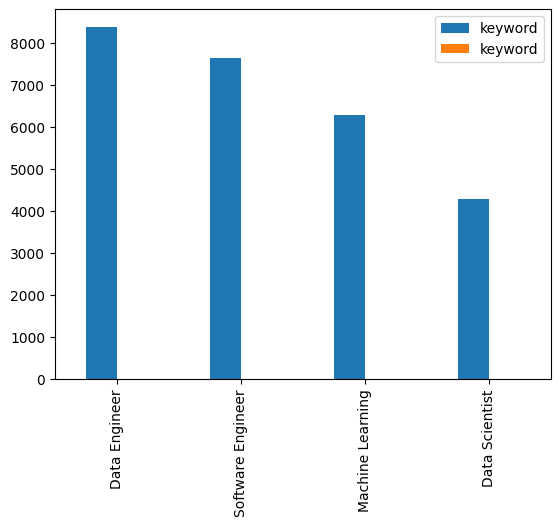

In [19]:
# Drop all columns that are not related to the questions of interests 
df_all.drop(['row_id', 'created_at', 'modified_at', 'task_id'],axis=1,inplace=True)
# 
a= pd.concat([df_all['keyword'].value_counts(),df_all['keyword'].value_counts(normalize=True)],axis=1)
print(a)



x = a.index
y = a['keyword'].values

a.plot.bar()

plt.show() 


In [4]:
pd.concat([df_all['title'].value_counts(),df_all['title'].value_counts(normalize=True)],axis=1).head(10)

,title,title
Data Engineer,2049,0.077132
Data Scientist,1321,0.049727
Software Engineer,1264,0.047581
Senior Data Engineer,522,0.019650
Python Developer,521,0.019612
Machine Learning Engineer,415,0.015622
Software Development Engineer,389,0.014643
Senior Data Scientist,278,0.010465
Software Developer,277,0.010427
Data Analyst,208,0.007830


In [5]:
pd.concat([df_all['company'].value_counts(),df_all['company'].value_counts(normalize=True)],axis=1).head(20)

,company,company
Amazon,956,0.035987
IBM,539,0.020290
Luxoft,427,0.016074
Meta,207,0.007792
Microsoft,206,0.007755
Harnham,137,0.005157
EY,137,0.005157
Canonical,107,0.004028
Tata Consultancy Services,104,0.003915
KLIENT jobdesk.pl,104,0.003915


In [6]:
pd.concat([df_all['skills_platform'].value_counts(),df_all['skills_platform'].value_counts(normalize=True)],axis=1).head(20)

,skills_platform,skills_platform
,22728,0.870838
Google Cloud Platform,498,0.019081
Microsoft Azure,485,0.018583
IBM Cloud,421,0.016131
Amazon Web Services,315,0.012069
Azure Data Lake,127,0.004866
AWS Lambda,102,0.003908
Spotify,70,0.002682
OpenShift,67,0.002567
Firebase,47,0.001801


In [7]:
df_all['skills_prog_langs'].value_counts().head(20)

                                                       798
e                                                      321
Python                                                 258
SQL                                                    143
Java                                                    95
e SQL                                                   93
Python SQL                                              87
Focus Spark SQL Java Python Scala basic reason          78
e Python                                                77
plus                                                    77
SQL Python                                              71
Scratch source self SQL pipelines processing Python     64
pipelines SQL Python R Java plus                        62
focus reason                                            54
pipelines Python basic plus Scala e                     53
focus                                                   49
scratch D clean                                         

In [8]:
df_all['title'].value_counts()

Data Engineer                               2049
Data Scientist                              1321
Software Engineer                           1264
Senior Data Engineer                         522
Python Developer                             521
                                            ... 
AI / Data Engineer Internship                  1
Data Engineer (Azure) | Nieuwegein             1
Technical Customer Data Engineer - SWIFT       1
Sr. Azure Data Engineer                        1
Senior Software Engineer - OCI Messaging       1
Name: title, Length: 10772, dtype: int64

In [9]:
df_visajob=df_all[df_all['description'].str.contains(r'visa|work permit|relocation',na=False)]

In [86]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Yaping.Lang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [144]:
#from textblob import TextBlob
from langdetect import detect
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()


def text_sentiment_analysis(single_description):
    #print(document)
    #print('------')
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    word_list = ['visa', 'visas', 'work permit', 'work permits', 'relocation']

    #for document in df_description_column:
        # Clean the text by replacing /n with.
    single_description = single_description.replace("\n", ". ").replace('..', '. ')    
    #if (detect(single_description) == 'en'):
        # for paragraph in document:
    contains = [s for s in nltk.sent_tokenize(single_description) if any(word in s.split() for word in word_list) and sid_obj.polarity_scores(s)['compound'] > 0 and sid_obj.polarity_scores(s)['neg'] <= 0]
    #valid_count += 1
        # for s in nltk.sent_tokenize(document):
        # if any(word in s.split() for word in word_list) and sid_obj.polarity_scores(s)['compound']>0 and sid_obj.polarity_scores(s)['neg']<=0:
        #print(str(sid_obj.polarity_scores(s)['compound']) + '----'+str(sid_obj.polarity_scores(s)['neg'])+'----'+str(sid_obj.polarity_scores(s)['pos'])+ '----'+str(sid_obj.polarity_scores(s)['neu'])+ '------'+s)
        # valid_count+=1
        # if contains:
    print(contains)
    # return a dict for {visa sentence, compound, neg, pos, neu}

    return pd.Series([detect(single_description),contains])

print(df_visajob.shape) 
df_visajob[['Language','Visa_sentences']]=df_visajob['description'].apply(text_sentiment_analysis)

print(df_visajob.shape) 


(940, 18)
['Therefore, in order to be considered for this position, you must have the ability to work without a need for current or future visa sponsorship.']
[]
['To save time applying, Toyota does not offer sponsorship of job applicants for employment-based visas or any other work authorization for this position at this time.']
[]
[]
['Therefore, in order to be considered for this position, you must have the ability to work without a need for current or future visa sponsorship.']
[]
[]
['Therefore, in order to be considered for this position, you must have the ability to work without a need for current or future visa sponsorship.']
['Therefore, in order to be considered for this position, you must have the ability to work without a need for current or future visa sponsorship.']
[]
[]
[]
[]
[]
[]
['Therefore, in order to be considered for this position, you must have the ability to work without a need for current or future visa sponsorship.']
['Benefits include: a competitive base sal

In [188]:
df_en_only_jobs = df_visajob[(df_visajob['Language']=='en')]
df_en_only_jobs.drop(['created_at','modified_at','task_id'], axis=1, inplace=True)
df_en_visa_jobs= df_en_only_jobs[df_en_only_jobs['Visa_sentences'].map(bool)]
print(df_en_visa_jobs)

       row_id            keyword        country      job_id  \
7           8     Data Scientist  United States  2928661999   
130       131     Data Scientist  United States  2922172925   
276       277     Data Scientist  United States  2925069423   
463       464     Data Scientist  United States  2912007098   
467       468     Data Scientist  United States  2923218725   
...       ...                ...            ...         ...   
25791   25792  Software Engineer    Netherlands  2876165199   
25838   25839  Software Engineer    Netherlands  2797330985   
25855   25856  Software Engineer    Netherlands  2917743112   
25863   25864  Software Engineer    Netherlands  2923977154   
25895   25896  Software Engineer    Netherlands  2910280292   

                    company  \
7                       IBM   
130    Toyota North America   
276                     IBM   
463                 Kyndryl   
467                 Kyndryl   
...                     ...   
25791    NXP Semiconductor

/Users/Yaping.Lang/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [189]:
pd.concat([df_en_visa_jobs['company'].value_counts(),df_en_visa_jobs['company'].value_counts(normalize=True)],axis=1).head(20)

,company,company
Cobblestone Energy,16,0.051282
Amazon,13,0.041667
Delivery Hero SE,11,0.035256
FREE NOW,10,0.032051
Optiver,9,0.028846
IBM,8,0.025641
Tesco Bengaluru,8,0.025641
Booking.com,8,0.025641
Tesla,6,0.019231
Back Market,6,0.019231


In [190]:
pd.concat([df_en_visa_jobs['country'].value_counts(),df_en_visa_jobs['country'].value_counts(normalize=True)],axis=1).head(20)

,country,country
Germany,114,0.365385
Netherlands,51,0.163462
United States,39,0.125000
France,24,0.076923
United Kingdom,18,0.057692
Poland,16,0.051282
Canada,14,0.044872
India,13,0.041667
Brazil,8,0.025641
Italy,8,0.025641


In [191]:
pd.concat([df_en_visa_jobs['location'].value_counts(),df_en_visa_jobs['location'].value_counts(normalize=True)],axis=1).head(20)

,location,location
Berlin,71,0.227564
Amsterdam,36,0.115385
Paris,16,0.051282
"Bengaluru, Karnataka, India",10,0.032051
München,8,0.025641
"Berlin, Deutschland",7,0.022436
"Oxford, England, United Kingdom",6,0.019231
"Brandenburg, Deutschland",6,0.019231
"Chicago, IL",5,0.016026
Eindhoven,5,0.016026


In [200]:
df_en_visa_jobs[df_en_visa_jobs['country'] == 'United Kingdom']

,row_id,keyword,country,job_id,company,title,location,salary,description,skills_frameworks,skills_databases,skills_platform,skills_prog_langs,Language,Visa_sentences
6848,6849,Data Engineer,United Kingdom,2924131728,TravelPerk,Data Engineer,"London, England, United Kingdom",None,We are TravelPerk: a scaling unicorn valued at...,,Elasticsearch,,pipelines processing SQL ease Basic python go,en,[For certain positions we can help with reloca...
7447,7448,Data Engineer,United Kingdom,2929986966,Cobblestone Energy,DATA ENGINEER - Dubai or Remote,"London, England, United Kingdom",None,About Cobblestone\nCobblestone Energy is an in...,Docker Pandas NumPy,MySQL Cassandra,,go small processing pipelines plus Python SQL ...,en,[Work shall be done from your home country wit...
7491,7492,Data Engineer,United Kingdom,2924176297,Merkle,Data Engineer Azure,"England, United Kingdom",None,About Merkle\nDentsu are merging the media ski...,,,,focus simple joy hope Spark Scala,en,"[At the point of application, the candidate mu..."
7502,7503,Data Engineer,United Kingdom,2929986970,Cobblestone Energy,DATA ENGINEER - Dubai or Remote,"Oxford, England, United Kingdom",None,About Cobblestone\nCobblestone Energy is an in...,Docker Pandas NumPy,MySQL Cassandra,,go small processing pipelines plus Python SQL ...,en,[Work shall be done from your home country wit...
7526,7527,Data Engineer,United Kingdom,2898175486,McGregor Boyall,Azure Data engineer,"London, England, United Kingdom",None,I am working exclusively with an important leg...,,,,Processing T SQL Python Spark,en,[The opportunity is for candidates eligible to...
14733,14734,Machine Learning,United Kingdom,2936376508,Cambridge Consultants,Graduate Machine Learning Engineer / Data Scie...,"Cambridge, England, United Kingdom",None,You can apply to multiple jobs at once using t...,,,,signal processing Python MATLAB R plus Plus,en,[A comprehensive relocation package is availab...
14819,14820,Machine Learning,United Kingdom,2915119751,Understanding Recruitment,Python Developer,United Kingdom,"£95,000.00\n -\n £100,00...",Python Developer – AI x Security\nSalary up to...,Docker,,,Python,en,[A relocation package – we will contribute wit...
21532,21533,Software Engineer,United Kingdom,2928422499,Vaticle,Junior Software Engineer (Platform),"Marylebone, England, United Kingdom",None,The Company\nVaticle is a team of people drive...,Docker,,Microsoft Azure,Java Kotlin Bash R D source e,en,"[Visa sponsorship, and relocation support]"
21536,21537,Software Engineer,United Kingdom,2931564578,Merkle,Junior Software Developer,"England, United Kingdom",None,Company Description\nMerkle is a leading data-...,,MySQL,Google Cloud Platform,rapid small TypeScript clean,en,"[At the point of application, the candidate mu..."
21689,21690,Software Engineer,United Kingdom,2928251180,Tributary Games,Contract Web Developer,United Kingdom,None,We’re seeking a contract web developer for a 3...,,,,,en,[Please note that we do not offer working visa...


In [212]:
top_N = 20
#if not necessary all lower
a = df_en_visa_jobs['skills_frameworks'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)
#<FreqDist with 17 samples and 20 outcomes>

rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 20 samples and 278 outcomes>
            Word  Frequency
0         docker         76
1         pandas         38
2          numpy         32
3     tensorflow         20
4         scikit         17
5          learn         17
6         apache         13
7          spark         13
8        pytorch         12
9          keras          7
10         mxnet          6
11  transformers          5
12         scipy          5
13    matplotlib          5
14        opencv          3
15        plotly          3
16        automl          2
17     container          2
18         spacy          1
19     streamlit          1


In [213]:
top_N = 20
#if not necessary all lower
a = df_en_visa_jobs['skills_platform'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)
#<FreqDist with 17 samples and 20 outcomes>

rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 17 samples and 123 outcomes>
         Word  Frequency
0       cloud         23
1   microsoft         15
2       azure         15
3      google         13
4    platform         13
5         ibm          9
6      amazon          6
7         web          5
8    services          5
9         aws          5
10     lambda          5
11   firebase          4
12     kaggle          1
13   redshift          1
14  openshift          1
15   database          1
16    spotify          1


In [214]:
top_N = 20
#if not necessary all lower
a = df_en_visa_jobs['skills_databases'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)
#<FreqDist with 17 samples and 20 outcomes>

rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 13 samples and 155 outcomes>
             Word  Frequency
0           mysql         35
1       snowflake         32
2       cassandra         31
3   elasticsearch         21
4         mongodb         10
5           redis          8
6          oracle          8
7           hbase          5
8             db2          1
9       aerospike          1
10      memcached          1
11      couchbase          1
12        rocksdb          1


In [267]:
top_N = 40
#if not necessary all lower
a = df_en_visa_jobs['skills_prog_langs'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)
#<FreqDist with 17 samples and 20 outcomes>

rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 80 samples and 1993 outcomes>
          Word  Frequency
0       python        226
1          sql        141
2            e        117
3         java        108
4    pipelines        105
5         plus        105
6   processing         81
7        spark         74
8         self         74
9        focus         73
10          go         66
11       small         57
12           r         53
13           b         45
14       basic         44
15      source         43
16       scala         41
17          ml         39
18  javascript         36
19           d         36
20       clean         35
21      scheme         35
22           f         22
23       rapid         22
24          s3         21
25  typescript         20
26      reason         18
27      simple         18
28      kotlin         17
29           s         16
30        cool         16
31        bash         14
32           k         13
33      inform         12
34        ruby         11
35         dog     

In [249]:

nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import ne_chunk, pos_tag, word_tokenize, sent_tokenize
from nltk.tree import Tree

def get_continuous_chunks(document):
    for text in sent_tokenize(document):
        chunked = ne_chunk(pos_tag(word_tokenize(text)))
        continuous_chunk = []
        current_chunk = []
        for i in chunked:
                if type(i) == Tree:
                    current_chunk.append(" ".join([token for token, pos in i.leaves()]))
                if current_chunk:
                    named_entity = " ".join(current_chunk)
                    if named_entity not in continuous_chunk:
                        continuous_chunk.append(named_entity)
                        current_chunk = []
                else:
                    continue
        return continuous_chunk

my_sent = "Work shall be done from your home country with periodic travels to Dubai in which case Cobblestone Energy shall handle all visa and paperwork issues on your behalf.-"
#b = df_en_visa_jobs['skills_platform'].str.cat(sep='.')
#get_continuous_chunks(b)
b= df_en_visa_jobs['skills_platform'].apply(get_continuous_chunks)
pd.concat([b.value_counts(),b.value_counts(normalize=True)],axis=1).head(20)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Yaping.Lang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/Yaping.Lang/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/Yaping.Lang/nltk_data...
[nltk_data]   Package words is already up-to-date!


,skills_platform,skills_platform
[IBM Cloud],9,0.204545
"[Microsoft, Azure]",8,0.181818
"[Google, Cloud Platform]",7,0.159091
[AWS Lambda],5,0.113636
[],3,0.068182
"[Firebase, Google Cloud Platform Microsoft Azure]",2,0.045455
"[Microsoft, Azure Amazon Web]",1,0.022727
[Google],1,0.022727
"[Google, Cloud Platform Microsoft Azure Firebase]",1,0.022727
[Kaggle],1,0.022727


UnboundLocalError: local variable 'continuous_chunk' referenced before assignment